In [ ]:
%%capture
!{sys.executable} -m pip install matplotlib
import sys
import json
import csv
import os
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
import matplotlib.pyplot as plt
import math
import numpy as np

[0, 1, 2]


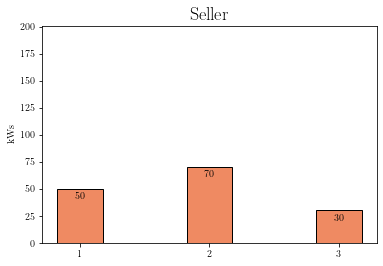

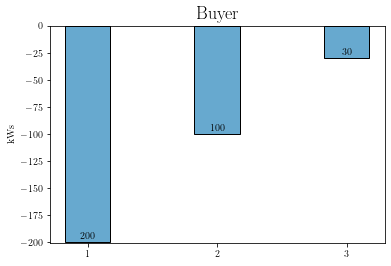

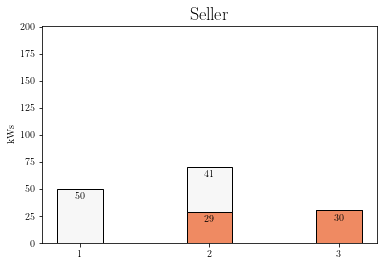

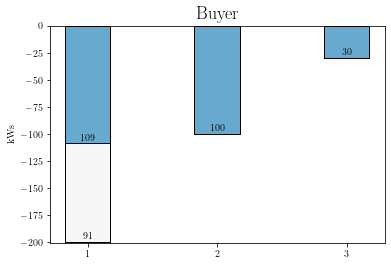

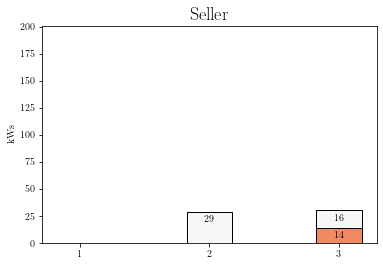

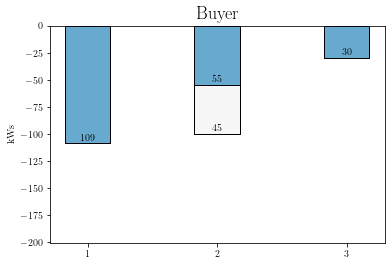

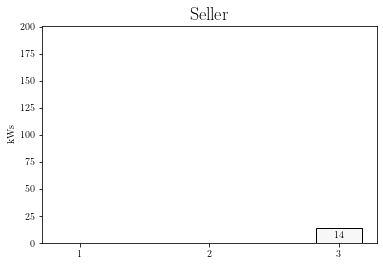

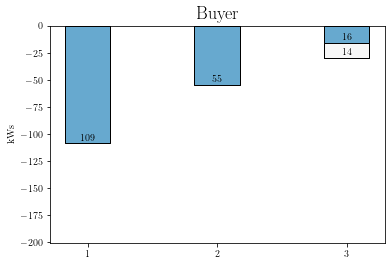

[0, 1, 2]


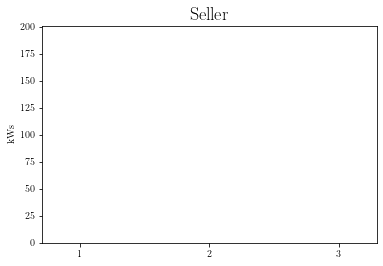

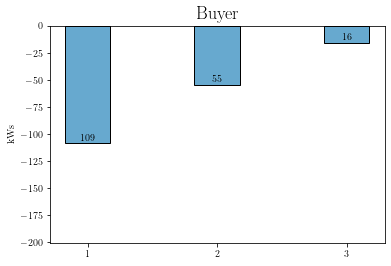

In [8]:
with open('../tmp/res.json') as json_file:
    data = json.load(json_file)
    deeds = data["deeds"]
    hFrom = data["hFrom"]
    hTo = data["hTo"]
from matplotlib import font_manager
    
def get_labels(x, y, is_buyer):
    if is_buyer:
        res = ([], [])
        for n1, n2 in zip(x, y):
            res[1].append(abs(n1 + n2))
            res[0].append(abs(n2) if n2 != 0 else "")
        return res
    else:
        return list(map(lambda entry: abs(entry) if entry != 0 else "", x))
    
def draw_start_buyer(x, y, color, title, idx):
    fig, ax = plt.subplots()
    x_pos = [i for i, _ in enumerate(x)]
    width = 0.35
    p1 = ax.bar(x_pos, y, color=color, width=width, edgecolor='black')
    ax.set_ylim(ymin=-201)
    for r1, l1 in zip(p1, get_labels(y, [], False)):
        h1 = r1.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2, h1 + 5, l1,ha='center', va='center')
    plt.title(title, **csfont, fontsize=18)
    ax.set_ylabel('kWs')
    plt.xticks(x_pos, x)
    
    plt.draw()
    plt.savefig('exports/' + title + str(idx))
    plt.show()

def draw_start_seller(x, y, color, title, idx):
    fig, ax = plt.subplots()
    x_pos = [i for i, _ in enumerate(x)]
    print(x_pos)
    width = 0.35
    p1 = ax.bar(x_pos, y, color=color, width=width, edgecolor='black')
    ax.set_ylim(ymax=201)
    for r1, l1 in zip(p1, get_labels(y, [], False)):
        h1 = r1.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2, h1 - 7, l1,ha='center', va='center')
    plt.title(title, **csfont, fontsize=18)
    ax.set_ylabel('kWs')
    plt.xticks(x_pos, x)
    plt.draw()
    plt.savefig('exports/' + title + str(idx))
    plt.show()

x = list(range(1, len(hFrom) + 1))
y = [x["meterDelta"] for x in hFrom]
draw_start_seller(x, y, "#ef8a62", "Seller", 0)

x = list(range(1, len(hTo) + 1))
y = [x["meterDelta"] for x in hTo]
draw_start_buyer(x, y, "#67a9cf", "Buyer", 0)

def draw_chart_buyer(old, new, color, title, idx):
    fig, ax = plt.subplots()
    x_pos = list(range(1, len(old) + 1))
    width = 0.35 
    p1 = ax.bar(x_pos, old, width, color=color, edgecolor='black')
    p2 = ax.bar(x_pos, new, width, color="#f7f7f7", bottom=old, edgecolor='black')
    ax.set_ylim(ymin=-201)
    ax.set_ylabel('kWs')
    label = get_labels(old, new, True)
    for r1, r2, l1, l2 in zip(p1, p2, label[0], label[1]):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2, h1 + 5, l1,ha='center', va='center')
        plt.text(r2.get_x() + r2.get_width() / 2, h1 + h2 + 5, l2,ha='center', va='center')
    plt.xticks(x_pos)
    plt.title(title, **csfont, fontsize=18)
    plt.draw()
    plt.savefig('exports/' + title + str(idx))
    plt.show()
    
def draw_chart_sellers(old, new, color, title, idx):
    fig, ax = plt.subplots()
    x_pos = list(range(1, len(old) + 1))
    width = 0.35 
    p1 = ax.bar(x_pos, old, width, color=color, edgecolor='black')
    p2 = ax.bar(x_pos, new, width, color="#f7f7f7", bottom=old, edgecolor='black')
    
    ax.set_ylim(ymax=201)
    ax.set_ylabel('kWs')
    for r1, r2, l1, l2 in zip(p1, p2, get_labels(old, [], False), get_labels(new, [], False)):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2, h1 - 7, l1,ha='center', va='center')
        plt.text(r2.get_x() + r2.get_width() / 2, h1 + h2 - 7, l2,ha='center', va='center')
        
    plt.xticks(x_pos)
    plt.title(title, **csfont, fontsize=18)
    plt.draw()
    plt.savefig('exports/' + title + str(idx))
    plt.show()
    

for idx, deed in enumerate(deeds):
    sending = [0] * len(hFrom) 
    receiving = [0] * len(hTo)
    for tx in deed:
        hFrom[tx["from"]]["meterDelta"] -= tx["amount"]
        sending[tx["from"]] += tx["amount"]
        receiving[tx["to"]] += tx["amount"]
    y = [x["meterDelta"] for x in hFrom]
    x = [x["meterDelta"] for x in hTo]
    draw_chart_sellers(y, sending, "#ef8a62", "Seller", idx + 1)
    draw_chart_buyer(x, receiving, "#67a9cf", "Buyer", idx + 1)
    for tx in deed:
        hTo[tx["to"]]["meterDelta"] += tx["amount"]
    
x = list(range(1, len(hFrom) + 1))
y = [x["meterDelta"] for x in hFrom]
draw_start_seller(x, y, "#ef8a62", "Seller", str(idx + 2))

x = list(range(1, len(hTo) + 1))
y = [x["meterDelta"] for x in hTo]
draw_start_buyer(x, y, "#67a9cf", "Buyer",str(idx + 2))
